# Convolutional Neural Network

In [2]:
# Image dimensions
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

### Importing the libraries

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [4]:
tf.__version__

'2.9.1'

## Data Preprocessing

### Preprocessing the Training set

In [5]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

training_set = train_datagen.flow_from_directory('input/Training',
                                                 target_size = IMG_SIZE,
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')
labels =training_set.class_indices
print(labels)


Found 5712 images belonging to 4 classes.
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


### Preprocessing the Test set

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('input/Testing',
                                            target_size = IMG_SIZE,
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 1311 images belonging to 4 classes.


## Building the CNN

### Loading the pretrained DenseNet121 model

In [7]:
base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

### Adding custom layers for multiclass classification

In [8]:

x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert feature maps to a vector
x = Dense(512, activation="relu")(x)  # Fully connected layer
x = Dense(256, activation="relu")(x)  # Additional fully connected layer
x = Dropout(0.2)(x) # Dropout layer
x = Dense(4, activation="softmax")(x)  # Output layer (4 classes)

### Creating a model

In [9]:
model = Model(inputs=base_model.input, outputs=x)

## Training the CNN

### Compiling the CNN

In [10]:
model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________


 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 112, 112, 64  256         ['conv1/conv[0][0]']             
          

### Training the CNN on the Training set and evaluating it on the Test set

In [11]:
history = model.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
179/179 [==============================] - 583s 3s/step - loss: 0.7182 - accuracy: 0.7262 - val_loss: 0.5355 - val_accuracy: 0.7910
Epoch 2/10
179/179 [==============================] - 650s 4s/step - loss: 0.4158 - accuracy: 0.8463 - val_loss: 0.4398 - val_accuracy: 0.8436
Epoch 3/10
179/179 [==============================] - 667s 4s/step - loss: 0.3616 - accuracy: 0.8739 - val_loss: 0.4093 - val_accuracy: 0.8459
Epoch 4/10
179/179 [==============================] - 681s 4s/step - loss: 0.3178 - accuracy: 0.8860 - val_loss: 0.4303 - val_accuracy: 0.8322
Epoch 5/10
179/179 [==============================] - 668s 4s/step - loss: 0.2986 - accuracy: 0.8911 - val_loss: 0.4127 - val_accuracy: 0.8406
Epoch 6/10
179/179 [==============================] - 786s 4s/step - loss: 0.2747 - accuracy: 0.9004 - val_loss: 0.3391 - val_accuracy: 0.8696
Epoch 7/10
179/179 [==============================] - 626s 3s/step - loss: 0.2580 - accuracy: 0.9074 - val_loss: 0.3651 - val_accuracy: 0.8543

## Making a single prediction

In [12]:
import numpy as np
from keras import utils
test_image = utils.load_img('input/Testing/notumor/Te-no_0018.jpg', target_size = IMG_SIZE)
test_image = utils.img_to_array(test_image) /255.0
test_image = np.expand_dims(test_image, axis = 0) # Convert single image to a batch.
predicted_indice_arr = model.predict(test_image)
print(predicted_indice_arr)
prediction = np.argmax(predicted_indice_arr, axis=1)

print(labels)
final_prediction = [key for key, val in labels.items() if val == prediction[0]]
print(final_prediction)


1/1 [==============================] - 4s 4s/step
[[0.01920203 0.00491201 0.970087   0.00579903]]
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
['notumor']


In [13]:
test_image = utils.load_img('input/Testing/pituitary/Te-pi_0018.jpg', target_size = IMG_SIZE)
test_image = utils.img_to_array(test_image) / 255.0
test_image = np.expand_dims(test_image, axis = 0) # Convert single image to a batch.
predicted_indice_arr = model.predict(test_image)
print(predicted_indice_arr)
prediction = np.argmax(predicted_indice_arr, axis=1)

print(labels)
final_prediction = [key for key, val in labels.items() if val == prediction[0]]
print(final_prediction)


1/1 [==============================] - 0s 220ms/step
[[1.4078626e-04 8.9184567e-03 2.0921361e-03 9.8884869e-01]]
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
['pituitary']


In [14]:
test_image = utils.load_img('input/Testing/glioma/Te-gl_0018.jpg', target_size = IMG_SIZE)
test_image = utils.img_to_array(test_image) / 255.0
test_image = np.expand_dims(test_image, axis = 0) # Convert single image to a batch.
predicted_indice_arr = model.predict(test_image)
print(predicted_indice_arr)
prediction = np.argmax(predicted_indice_arr, axis=1)

print(labels)
final_prediction = [key for key, val in labels.items() if val == prediction[0]]
print(final_prediction)


1/1 [==============================] - 0s 169ms/step
[[9.9799478e-01 1.4105034e-03 5.8520690e-04 9.5134501e-06]]
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
['glioma']


In [15]:
test_image = utils.load_img('input/Testing/meningioma/Te-me_0045.jpg', target_size = IMG_SIZE)
test_image = utils.img_to_array(test_image) / 255.0
test_image = np.expand_dims(test_image, axis = 0) # Convert single image to a batch.
predicted_indice_arr = model.predict(test_image)
print(predicted_indice_arr)
prediction = np.argmax(predicted_indice_arr, axis=1)

print(labels)
final_prediction = [key for key, val in labels.items() if val == prediction[0]]
print(final_prediction)


1/1 [==============================] - 0s 180ms/step
[[0.00414631 0.9614088  0.0080158  0.02642914]]
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
['meningioma']


## Visualize model performance

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
{'loss': [0.7181646823883057, 0.4157566428184509, 0.3616075813770294, 0.3177534341812134, 0.2986275553703308, 0.274686336517334, 0.2580004632472992, 0.2502342760562897, 0.24626971781253815, 0.2258278727531433], 'accuracy': [0.726190447807312, 0.8462885022163391, 0.8739495873451233, 0.8860294222831726, 0.8911064267158508, 0.9003851413726807, 0.9073879718780518, 0.9105392098426819, 0.9110644459724426, 0.9198179244995117], 'val_loss': [0.5355091691017151, 0.439755916595459, 0.4092525541782379, 0.4302842915058136, 0.4126702845096588, 0.33907222747802734, 0.3650749623775482, 0.2646757662296295, 0.27702516317367554, 0.2535759210586548], 'val_accuracy': [0.7909992337226868, 0.8436307907104492, 0.845919132232666, 0.83218914270401, 0.8405796885490417, 0.8695651888847351, 0.8543096780776978, 0.9000762701034546, 0.8863462805747986, 0.8939740657806396]}


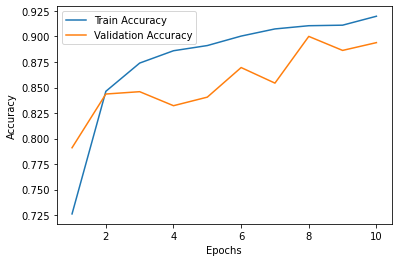

In [21]:
print(history.history.keys())
print(history.history)
epochs = range(1, len(history.history["accuracy"]) + 1)
plt.plot(epochs,  history.history["accuracy"], label="Train Accuracy")
plt.plot(epochs, history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

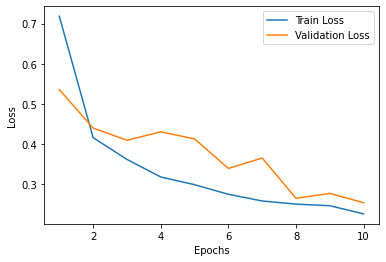

In [19]:
epochs = range(1, len(history.history["loss"]) + 1)
plt.plot(epochs,  history.history["loss"], label="Train Loss")
plt.plot(epochs, history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()